In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

### Data 생성

In [ ]:
x = np.linspace(0, 10, 100) # 0에서 10사이 100개의 샘플을 생성합니다.
train_x = x.copy()
noise = np.random.randn(len(x))*0.1 # 평균이 0이고 분산이 0.1인 정규분포에서 noise를 생성합니다.
y = np.sin(x) + noise # sin 그래프에 noise를 추가합니다.
train_y = y.copy()

Text(0, 0.5, 'target : y')

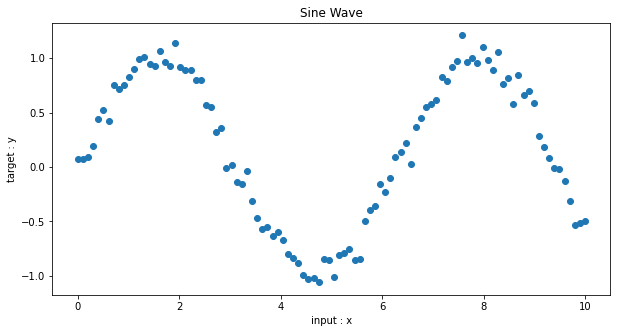

In [ ]:
plt.figure(figsize=(10,5)) # 출력 되는 plot의 사이즈를 조절합니다.
plt.plot(x, y, 'o')
plt.title('Sine Wave')
plt.xlabel("input : x")
plt.ylabel("target : y")

In [ ]:
np.random.seed(777)
np.random.shuffle(train_x)
np.random.seed(777)
np.random.shuffle(train_y)

### Linear Regression

In [ ]:
def loss_fn(y, y_hat):
    return 0.5*tf.reduce_mean((y-y_hat)**2) # MSE

def linear_regressor(w,b,x):
    return w*x+b

In [ ]:
def step(x,y,w,b,lr):
    # context 안에 실행된 모든 연산을 테이프(tape)에 "기록"합니다.
    with tf.GradientTape(persistent=True) as tape:
        y_hat = linear_regressor(w,b,x)
        loss = loss_fn(y, y_hat)
    
    w_grad, b_grad = tape.gradient(loss, (w,b))

    w.assign_sub(lr*w_grad) # w = w - lr*w_grad
    b.assign_sub(lr*b_grad) # b = b - lr*b_grad

    return loss

In [ ]:
w = tf.Variable(np.random.rand(), trainable=True)
b = tf.Variable(np.random.rand(), trainable=True)
lr = 0.01

for e in range(100):
    loss = step(train_x,train_y,w,b,lr)

    if e%10 == 0:
        print(loss.numpy())

0.96680415
0.26859704
0.2663632
0.26438844
0.26250952
0.26072165
0.25902054
0.25740185
0.25586167
0.25439617


In [ ]:
y_pred = w*x+b

Text(0, 0.5, 'target : y')

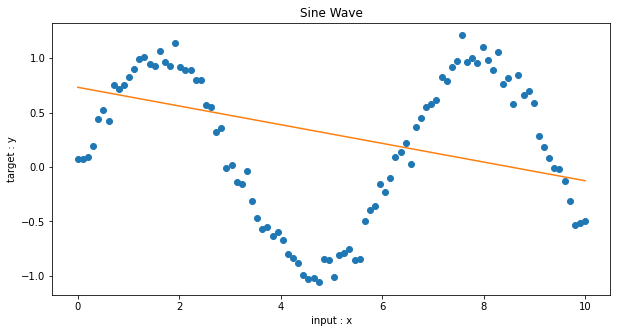

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(x, y, 'o')
plt.plot(x,y_pred)
plt.title('Sine Wave')
plt.xlabel("input : x")
plt.ylabel("target : y")

### MLP

In [ ]:
def step_fun(x):
    return tf.math.sign(x)

In [ ]:
def mlp(w1,w2,b1,b2,x):
    x = x[np.newaxis,:]
    h = step_fun(w1@x+b1)
    out = w2@h+b2
    return out

In [ ]:
def step(x,y,w1,b1,w2,b2,lr):
    with tf.GradientTape(persistent=True) as tape:
        y_hat = mlp(w1,w2,b1,b2,x)
        loss = loss_fn(y, y_hat)
    
    w1_grad, b1_grad, w2_grad, b2_grad = tape.gradient(loss, (w1,b1,w2,b2))

    w1.assign_sub(lr*w1_grad)
    b1.assign_sub(lr*b1_grad)
    w2.assign_sub(lr*w2_grad)
    b2.assign_sub(lr*b2_grad)

    return loss

In [ ]:
w1 = tf.Variable(np.random.randn(100,1)*0.1)
b1 = tf.Variable(np.random.randn(100,1))
w2 = tf.Variable(np.random.randn(1,100)*0.1)
b2 = tf.Variable(np.random.randn(1,1))
lr = 0.01

In [ ]:
for e in range(1000):
    loss = step(train_x, train_y,w1,b1,w2,b2,lr)

    if e%100 == 0:
        print(loss.numpy())

0.7178679609513025
0.06907615389555567
0.05571744747136178
0.05162145554441018
0.04986787446411989
0.0489417848009185
0.048368402059843184
0.04797008010378132
0.04766943985040362
0.047428427997544105


In [ ]:
y_pred = mlp(w1,w2,b1,b2,x)

Text(0, 0.5, 'target : y')

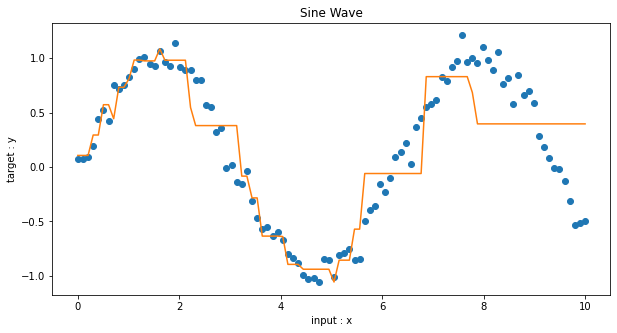

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(x, y, 'o')
plt.plot(x,y_pred[0,:])
plt.title('Sine Wave')
plt.xlabel("input : x")
plt.ylabel("target : y")

### Keras API로 MLP 구현하기

In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(100,
                                                   activation='relu'),
                             tf.keras.layers.Dense(100,
                                                   activation='relu'),
                             tf.keras.layers.Dense(1)
])

In [ ]:
model(tf.keras.layers.Input((1,)))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 100)               200       
_________________________________________________________________
dense_10 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 101       
Total params: 10,401
Trainable params: 10,401
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.05),
              loss='mse')

In [ ]:
model.fit(train_x, train_y, epochs=1000, verbose=0)

In [ ]:
model.evaluate(data)

1/1 [==============================] - 0s 66ms/step - loss: 0.0568


0.056767139583826065

In [ ]:
y_pred = model.predict(x)

Text(0, 0.5, 'target : y')

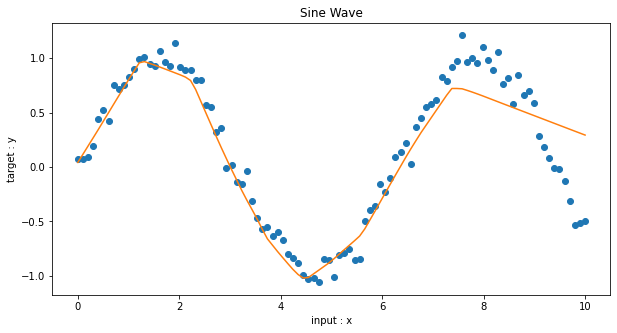

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(x, y, 'o')
plt.plot(x,y_pred[:,0])
plt.title('Sine Wave')
plt.xlabel("input : x")
plt.ylabel("target : y")